In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import hashlib
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Tahap EDA

In [3]:
# Dataset sudah digabungkan
dataset_path = '/content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/New_Dataset_DaunTeh/MERGED tea leaf diseases dataset/'

# Menampilkan folder dalam dataset
for root, dirs, files in os.walk(dataset_path):
    print(f"Direktori: {root}")
    print(f"Subfolder: {dirs}")
    print(f"Files: {files}")
    print()

Direktori: /content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/New_Dataset_DaunTeh/MERGED tea leaf diseases dataset/
Subfolder: ['bird eye spot', 'anthracnose', 'red scab', 'red leaf spot', 'grey blight', 'white spot', 'healthy', 'algal leaf spot', 'brown blight']
Files: []

Direktori: /content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/New_Dataset_DaunTeh/MERGED tea leaf diseases dataset/bird eye spot
Subfolder: []
Files: ['IMG_20220503_155113.jpg', 'IMG_20220503_154813.jpg', 'IMG_20220503_160802.jpg', 'IMG_20220503_155715.jpg', 'IMG_20220503_160625.jpg', 'IMG_20220503_154153.jpg', 'IMG_20220503_154620.jpg', 'IMG_20220503_160546.jpg', 'IMG_20220503_154409.jpg', 'IMG_20220503_154119.jpg', 'IMG_20220503_154541.jpg', 'IMG_20220503_154341.jpg', 'IMG_20220503_160518.jpg', 'IMG_20220503_154332.jpg', 'IMG_20220503_154034.jpg', 'IMG_20220503_154347.jpg', 'IMG_20220503_154133.jpg', 'IMG_20220503_155459.jpg', 'IMG_20220503_154632.jpg', 'IMG_

In [4]:
# Menampilkan jumlah gambar perkategori
# Daftar subfolder yang ada (kategori penyakit dan sehat)
categories = ['healthy', 'grey blight', 'anthracnose', 'algal leaf spot', 'red scab', 'white spot', 'bird eye spot', 'brown blight', 'red leaf spot']

# Menampilkan kategori beserta jumlah gambarnya
category_counts = {category: len(os.listdir(os.path.join(dataset_path, category))) for category in categories}
print("Jumlah gambar per kategori:", category_counts)

# Menghitung total gambar pada dataset
image_count = sum(category_counts.values())
print(f"Jumlah total gambar di dataset: {image_count}")

Jumlah gambar per kategori: {'healthy': 1098, 'grey blight': 1731, 'anthracnose': 100, 'algal leaf spot': 1656, 'red scab': 500, 'white spot': 142, 'bird eye spot': 100, 'brown blight': 1424, 'red leaf spot': 644}
Jumlah total gambar di dataset: 7395


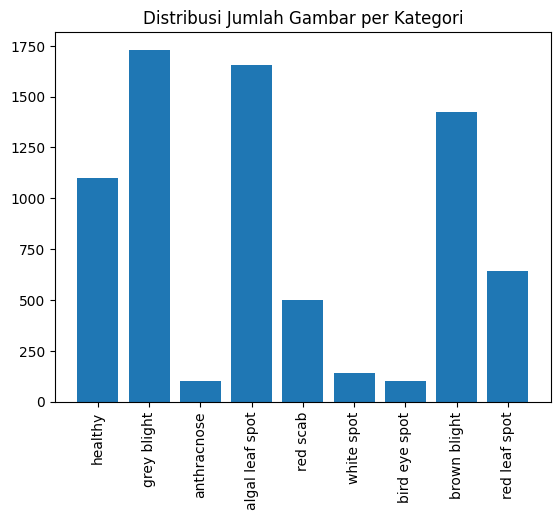

In [5]:
# Distibusi kelas
plt.bar(category_counts.keys(), category_counts.values())
plt.xticks(rotation=90)
plt.title("Distribusi Jumlah Gambar per Kategori")
plt.show()

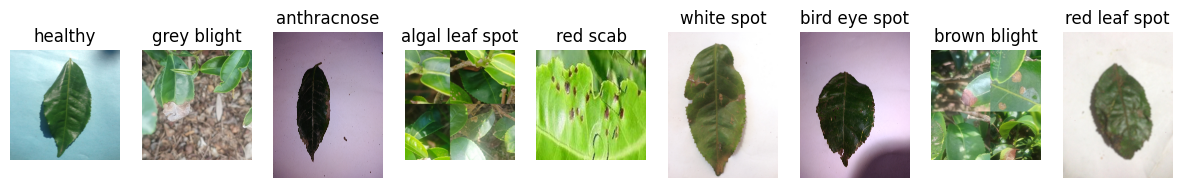

In [6]:
# Visualisasi Gambar
# Menampilkan gambar secara random dari setiap kategori
fig, axs = plt.subplots(1, len(categories), figsize=(15, 3))

for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    random_image = random.choice(os.listdir(category_path))
    img = Image.open(os.path.join(category_path, random_image))

    axs[i].imshow(img)
    axs[i].set_title(category)
    axs[i].axis('off')

plt.show()

In [7]:
# Memeriksa ukuran gambar dan hanya menampilkan 5 gambar pertama per kelas
def check_image_size(dataset_path, max_images_per_class=5):
    for class_folder in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_folder)
        if os.path.isdir(class_path):
            image_count = 0
            for image_name in os.listdir(class_path):
                if image_count >= max_images_per_class:
                    break  # Hanya tampilkan 5 gambar pertama
                img_path = os.path.join(class_path, image_name)
                try:
                    with Image.open(img_path) as img:
                        print(f'Class: {class_folder}, Image: {image_name}, Size: {img.size}')
                except Exception as e:
                    print(f"Error opening {img_path}: {e}")
                image_count += 1

# Memeriksa ukuran gambar masing-masing dataset (hanya 5 gambar pertama tiap kelas)
check_image_size(dataset_path, max_images_per_class=5)

Class: bird eye spot, Image: IMG_20220503_155113.jpg, Size: (4160, 3120)
Class: bird eye spot, Image: IMG_20220503_154813.jpg, Size: (3120, 4160)
Class: bird eye spot, Image: IMG_20220503_160802.jpg, Size: (3120, 4160)
Class: bird eye spot, Image: IMG_20220503_155715.jpg, Size: (4160, 3120)
Class: bird eye spot, Image: IMG_20220503_160625.jpg, Size: (4160, 3120)
Class: anthracnose, Image: IMG_20220503_143759.jpg, Size: (4160, 3120)
Class: anthracnose, Image: IMG_20220503_145738.jpg, Size: (3120, 4160)
Class: anthracnose, Image: IMG_20220503_145512.jpg, Size: (3120, 4160)
Class: anthracnose, Image: IMG_20220503_144022.jpg, Size: (4160, 3120)
Class: anthracnose, Image: IMG_20220503_150043.jpg, Size: (3120, 4160)
Class: red scab, Image: Tea red scab_107.jpg, Size: (1024, 1024)
Class: red scab, Image: Tea red scab_1.jpg, Size: (1024, 1024)
Class: red scab, Image: Tea red scab_102.jpg, Size: (1024, 1024)
Class: red scab, Image: Tea red scab_10.jpg, Size: (1024, 1024)
Class: red scab, Image:

In [9]:
# Memeriksa gambar yang rusak atau korup
for category in categories:
    category_path = os.path.join(dataset_path, category)
    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file)
        try:
            img = Image.open(img_path)
            img.verify()  # Cek apakah gambar valid
        except (IOError, SyntaxError) as e:
            print(f"Corrupted image: {img_path}")

In [10]:
# Memeriksa duplikasi data
# Fungsi untuk menghasilkan hash gambar
def hash_image(image_path):
    with Image.open(image_path) as img:
        img = img.convert('RGB')
        img = img.resize((8, 8))
        pixel_values = list(img.getdata())
        hash_value = hashlib.md5(str(pixel_values).encode()).hexdigest()  # Membuat hash MD5 dari pixel
    return hash_value

# Menyimpan hash gambar untuk mendeteksi duplikat
hashes = {}
duplicates = []

# Mengecek semua gambar dalam dataset
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(('jpg', 'jpeg', 'png')):  # Periksa ekstensi gambar
            image_path = os.path.join(root, file)
            image_hash = hash_image(image_path)

            if image_hash in hashes:
                duplicates.append(image_path)  # Menyimpan gambar yang duplikat
            else:
                hashes[image_hash] = image_path  # Menyimpan hash gambar

# Menampilkan hasil
if duplicates:
    print(f'Terdapat duplikat gambar yang ditemukan sebanyak: {len(duplicates)}')
    for dup in duplicates:
        print(dup)
else:
    print("Tidak ditemukan gambar duplikat.")

Terdapat duplikat gambar yang ditemukan sebanyak: 2842
/content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/New_Dataset_DaunTeh/MERGED tea leaf diseases dataset/anthracnose/IMG_20220503_150405.jpg
/content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/New_Dataset_DaunTeh/MERGED tea leaf diseases dataset/red scab/Tea red scab_105.jpg
/content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/New_Dataset_DaunTeh/MERGED tea leaf diseases dataset/red scab/Tea red scab_103.jpg
/content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/New_Dataset_DaunTeh/MERGED tea leaf diseases dataset/red scab/Tea red scab_100.jpg
/content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/New_Dataset_DaunTeh/MERGED tea leaf diseases dataset/red scab/Tea red scab_108.jpg
/content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/New_Dataset_DaunTeh/MERGED tea leaf diseases datas

Tahap Preprocessing

In [11]:
# Menghapus duplikat data

# Menghasilkan hash gambar
def hash_image(image_path):
    with Image.open(image_path) as img:
        img = img.convert('RGB')
        img = img.resize((8, 8))
        pixel_values = list(img.getdata())  # Mengambil nilai piksel gambar
        hash_value = hashlib.md5(str(pixel_values).encode()).hexdigest()  # Membuat hash MD5 dari pixel
    return hash_value

# Menyimpan hash gambar untuk mendeteksi duplikat
hashes = {}
duplicates = []

# Mengecek semua gambar dalam dataset
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(('jpg', 'jpeg', 'png')):  # Periksa ekstensi gambar
            image_path = os.path.join(root, file)
            image_hash = hash_image(image_path)

            if image_hash in hashes:
                duplicates.append(image_path)  # Menyimpan gambar yang duplikat
                os.remove(image_path)  # Menghapus gambar duplikat
                print(f"Duplikat ditemukan dan dihapus: {image_path}")
            else:
                hashes[image_hash] = image_path  # Menyimpan hash gambar

# Menampilkan hasil
if duplicates:
    print(f'Terdapat duplikat gambar yang ditemukan dan dihapus sebanyak: {len(duplicates)}')
else:
    print("Tidak ditemukan gambar duplikat.")


Duplikat ditemukan dan dihapus: /content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/New_Dataset_DaunTeh/MERGED tea leaf diseases dataset/anthracnose/IMG_20220503_150405.jpg
Duplikat ditemukan dan dihapus: /content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/New_Dataset_DaunTeh/MERGED tea leaf diseases dataset/red scab/Tea red scab_105.jpg
Duplikat ditemukan dan dihapus: /content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/New_Dataset_DaunTeh/MERGED tea leaf diseases dataset/red scab/Tea red scab_103.jpg
Duplikat ditemukan dan dihapus: /content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/New_Dataset_DaunTeh/MERGED tea leaf diseases dataset/red scab/Tea red scab_100.jpg
Duplikat ditemukan dan dihapus: /content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/New_Dataset_DaunTeh/MERGED tea leaf diseases dataset/red scab/Tea red scab_108.jpg
Duplikat ditemukan dan d

In [12]:
# Menampilkan jumlah gambar perkategori setelah menghapus duplikat data
# Daftar subfolder yang ada (kategori penyakit dan sehat)
categories = ['healthy', 'grey blight', 'anthracnose', 'algal leaf spot', 'red scab', 'white spot', 'bird eye spot', 'brown blight', 'red leaf spot']

# Menampilkan kategori beserta jumlah gambarnya
category_counts = {category: len(os.listdir(os.path.join(dataset_path, category))) for category in categories}
print("Jumlah gambar per kategori:", category_counts)

# Menghitung total gambar pada dataset
image_count = sum(category_counts.values())
print(f"Jumlah total gambar di dataset: {image_count}")

Jumlah gambar per kategori: {'healthy': 668, 'grey blight': 1009, 'anthracnose': 99, 'algal leaf spot': 1268, 'red scab': 27, 'white spot': 142, 'bird eye spot': 100, 'brown blight': 1057, 'red leaf spot': 182}
Jumlah total gambar di dataset: 4552


In [13]:
# Resize gambar
new_size = (224, 224)

# Mengecek dan meresize setiap gambar dalam folder
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(('jpg', 'jpeg', 'png')):  # Memeriksa format gambar
            image_path = os.path.join(root, file)

            # Membuka gambar dan meresize
            image = Image.open(image_path)
            resized_image = image.resize(new_size)

            # Menyimpan gambar yang telah diresize
            resized_image.save(image_path)


In [16]:
# Memeriksa ukuran salah satu gambar setelah di resize
image_path = '/content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/New_Dataset_DaunTeh/MERGED tea leaf diseases dataset/red leaf spot/Tea red leaf spot_10.jpg'
image = Image.open(image_path)

# Melihat ukuran gambar setelah di-resize
print("Ukuran gambar setelah di-resize:", resized_image.size)

Ukuran gambar setelah di-resize: (224, 224)


In [17]:
# DON'T EDIT
# Memisahkan data untuk Test

# Direktori test baru
#test_dir = '/content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/New_Dataset_DaunTeh/MERGED tea leaf diseases dataset/test/'

# Membuat folder untuk test jika belum ada
#if not os.path.exists(test_dir):
    #os.makedirs(test_dir)

# Loop untuk setiap subfolder (kelas)
#for class_name in os.listdir(dataset_path):
    #class_path = os.path.join(dataset_path, class_name)

    #if os.path.isdir(class_path):
        # Membuat folder test untuk kelas tersebut
        #class_test_dir = os.path.join(test_dir, class_name)
        #if not os.path.exists(class_test_dir):
            #os.makedirs(class_test_dir)

        # Ambil daftar gambar dalam subfolder kelas
        #image_files = os.listdir(class_path)

        # Periksa apakah ada gambar dalam folder
        #if len(image_files) == 0:
            #print(f"Tidak ada gambar dalam kelas {class_name}.")
            #continue

        # Tentukan jumlah gambar yang akan dipindahkan ke test set (misalnya 10%)
        #num_test_images = int(0.1 * len(image_files))

        # Pastikan ada gambar yang akan dipindahkan
        #if num_test_images == 0:
            #print(f"Tidak ada gambar yang cukup untuk dipindahkan ke test set untuk kelas {class_name}.")
            #continue

        # Pilih gambar secara acak
        #test_images = random.sample(image_files, num_test_images)

        # Pindahkan gambar terpilih ke folder test
        #for image in test_images:
            #src = os.path.join(class_path, image)
            #dest = os.path.join(class_test_dir, image)
            #print(f"Memindahkan {src} ke {dest}")  # Debugging line
            #shutil.move(src, dest)


Memindahkan /content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/New_Dataset_DaunTeh/MERGED tea leaf diseases dataset/bird eye spot/IMG_20220503_160703.jpg ke /content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/New_Dataset_DaunTeh/MERGED tea leaf diseases dataset/test/bird eye spot/IMG_20220503_160703.jpg
Memindahkan /content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/New_Dataset_DaunTeh/MERGED tea leaf diseases dataset/bird eye spot/IMG_20220503_155244.jpg ke /content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/New_Dataset_DaunTeh/MERGED tea leaf diseases dataset/test/bird eye spot/IMG_20220503_155244.jpg
Memindahkan /content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/New_Dataset_DaunTeh/MERGED tea leaf diseases dataset/bird eye spot/IMG_20220503_155557.jpg ke /content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/New_Dataset_Daun

In [18]:
# Menampilkan jumlah gambar perkategori setelah menghapus duplikat data dan memisahkan data ke Test
# Daftar subfolder yang ada (kategori penyakit dan sehat)
categories = ['healthy', 'grey blight', 'anthracnose', 'algal leaf spot', 'red scab', 'white spot', 'bird eye spot', 'brown blight', 'red leaf spot']

# Menampilkan kategori beserta jumlah gambarnya
category_counts = {category: len(os.listdir(os.path.join(dataset_path, category))) for category in categories}
print("Jumlah gambar per kategori:", category_counts)

# Menghitung total gambar pada dataset
image_count = sum(category_counts.values())
print(f"Jumlah total gambar di dataset: {image_count}")

Jumlah gambar per kategori: {'healthy': 602, 'grey blight': 909, 'anthracnose': 90, 'algal leaf spot': 1142, 'red scab': 25, 'white spot': 128, 'bird eye spot': 90, 'brown blight': 952, 'red leaf spot': 164}
Jumlah total gambar di dataset: 4102


In [21]:
# Split data train (80%) dan validation (20%) menggunakan ImageDataGenerator dengan parameter validation_split=0.2
datagen_train_val = ImageDataGenerator(
    rescale=1./255,  # Normalisasi gambar
    validation_split=0.2,  # 20% untuk validasi
    # Augmentasi untuk training (menambahkan variasi gambar)
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data test (hanya normalisasi, tanpa augmentasi)
datagen_test = ImageDataGenerator(rescale=1./255)  # Hanya normalisasi

# Generator untuk data training
train_generator = datagen_train_val.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Generator untuk data validasi
validation_generator = datagen_train_val.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Generator untuk data test (hanya normalisasi tanpa augmentasi)
test_generator = datagen_test.flow_from_directory(
    '/content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/New_Dataset_DaunTeh/test_MERGED tea leaf diseases dataset/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Hanya untuk evaluasi, tanpa augmentasi
)


Found 3285 images belonging to 9 classes.
Found 817 images belonging to 9 classes.
Found 450 images belonging to 9 classes.
